In [2]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, mannwhitneyu, normaltest
import numpy as np

In [2]:
MOVING_META_DATA_PATH = "track-meta-data.json"
MOVING_AUDIO_FEATURES_PATH = "track-audio-features.json"

In [9]:
CONTROL_META_DATA_PATH = "control-track-meta-data.json"
CONTROL_AUDIO_FEATURES_PATH = "control-track-audio-features.json"

Different Control Group

In [14]:
CONTROL_META_DATA_PATH = "playlist_data/6qZnImkqxbRtL9FiwqHkGK-meta-data.json"
CONTROL_AUDIO_FEATURES_PATH = "playlist_data/6qZnImkqxbRtL9FiwqHkGK-audio-features.json"

In [15]:
with open(MOVING_META_DATA_PATH) as f:
    moving_meta_data = json.load(f)

In [16]:
with open(MOVING_AUDIO_FEATURES_PATH) as f:
    moving_audio_features = json.load(f)

In [17]:
with open(CONTROL_META_DATA_PATH) as f:
    control_meta_data = json.load(f)

In [19]:
with open(CONTROL_AUDIO_FEATURES_PATH) as f:
    control_audio_features = json.load(f)

In [20]:
def get_feature(feature_name, all_features):
    return list(map(lambda x: x[feature_name], all_features))

In [21]:
def get_meta_data(feature_name, meta_data):
    return list(map(lambda x: x[feature_name], meta_data))

In [22]:
moving_feature = {}
for feature in moving_audio_features[0].keys():
    moving_feature[feature] = get_feature(feature, moving_audio_features)

In [23]:
control_feature = {}
for feature in control_audio_features[0].keys():
    control_feature[feature] = get_feature(feature, control_audio_features)

In [24]:
moving_meta = {}
for feature in moving_meta_data[0].keys():
    moving_meta[feature] = get_meta_data(feature, moving_meta_data)

In [25]:
control_meta = {}
for feature in control_meta_data[0].keys():
    control_meta[feature] = get_meta_data(feature, control_meta_data)

3297
3019
P-Values
Normal-Test:	0.0
T-Test:		0.8903184714700958
Mann-Whitney:	0.6174377320300619


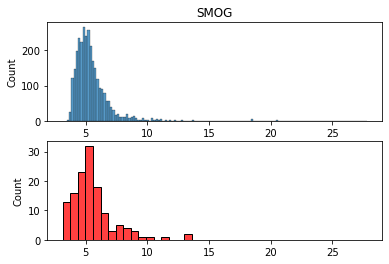

In [25]:
fig, axs = plt.subplots(2, 1)
# if data_source == "features":
#     feature1 = moving_feature[name]
#     feature2 = control_feature[name]
# elif data_source == "meta":
#     feature1 = moving_meta[name]
#     feature2 = control_meta[name]

feature1 = np.load("smog/moving.npy")
feature2 = np.load("smog/control.npy")

print(len(feature1))
feature1 = [x for x in feature1]
feature1 = list(filter(lambda x: x > 3.4 , feature1))

print(len(feature1))

# feature1 = list(range(1000))
# feature2 = list(range(1000))

x1_min, x1_max = min(feature1), max(feature1)
x2_min, x2_max = min(feature2), max(feature2)
x_min = min(x1_min, x2_min)
x_max = max(x1_max, x2_max)
diff = x_max - x_min
xlim = (x_min - (diff * 0.05), x_max + (diff * 0.05))
h1 = sns.histplot(feature1, ax=axs[0])
h2 = sns.histplot(feature2, ax=axs[1], color='r')
h1.set_xlim(xlim)
h2.set_xlim(xlim)

h1.set_title("SMOG")
print("P-Values")
print("Normal-Test:", normaltest(feature1).pvalue, sep="\t")
print("T-Test:", ttest_ind(feature1, feature2, equal_var=False).pvalue, sep="\t\t")
print("Mann-Whitney:", mannwhitneyu(feature1, feature2).pvalue, sep="\t")

P-Values
Normal-Test:	6.115171869209411e-74
T-Test:		6.132600967212547e-18
Mann-Whitney:	6.226159145557638e-21


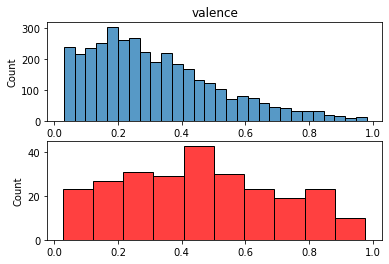

In [83]:
create_comparison_histograms("valence")

P-Values
Normal-Test:	1.8189372486766934e-121
T-Test:		9.078189081723354e-25
Mann-Whitney:	5.293786375947693e-24


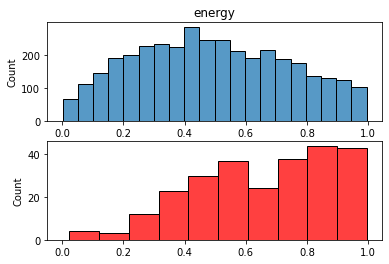

In [84]:
create_comparison_histograms("energy")

P-Values
Normal-Test:	0.006191027217558171
T-Test:		0.00016921028540001253
Mann-Whitney:	0.0002461062399480557


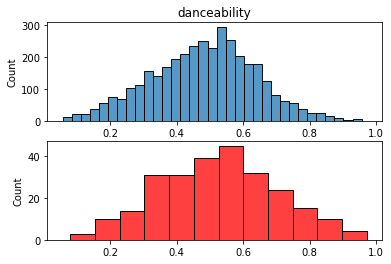

In [85]:
create_comparison_histograms("danceability")

P-Values
Normal-Test:	1.4328097301667345e-16
T-Test:		3.1448964709694925e-101
Mann-Whitney:	5.698208437059771e-106


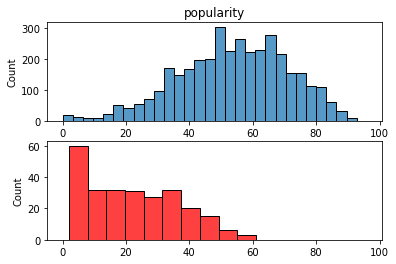

In [86]:
create_comparison_histograms("popularity", data_source="meta")

P-Values
Normal-Test:	0.0
T-Test:		5.146880837401583e-16
Mann-Whitney:	2.1066578716588119e-19


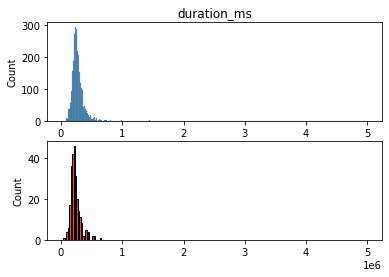

In [87]:
create_comparison_histograms("duration_ms", data_source="meta")

P-Values
Normal-Test:	9.458063911158476e-21
T-Test:		1.56013737424934e-05
Mann-Whitney:	4.514796212315444e-05


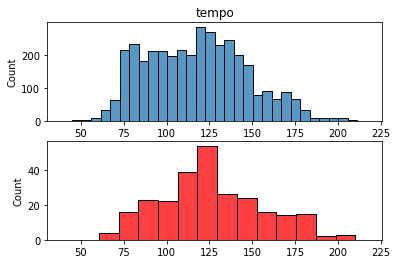

In [88]:
create_comparison_histograms("tempo")